### Time Series Forecasting - Commuter Forecast
#### Prediction methods: Simple Average, Moving Average and Seasonal Autoregressive Integrated Moving Average
#### This is a dataset of high-speed rail service commuters, including ID, Datetime and Count. This data set is a data from 2012-08-25 to 2014-09-25. The fields include ID, Datetime and Commuter Count. 
#### The goal of this project is to divide the data into a training set and a test set, and use the training set to predict the number of commuters in the future. The test set is the prediction data corresponding to the real data, and the three prediction methods are compared and analyzed.

In [1]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
# import 'jetrail.csv'
df = pd.read_csv('jetrail.csv')
df

,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2
4,4,2012-08-25 04:00:00,2
...,...,...,...
18283,18283,2014-09-25 19:00:00,868
18284,18284,2014-09-25 20:00:00,732
18285,18285,2014-09-25 21:00:00,702
18286,18286,2014-09-25 22:00:00,580


In [3]:
# Convert the time format of the Datetime column of df, connect the Datetime column to set the row index
df['Datetime'] = pd.to_datetime(df['Datetime']).dt.date
df.index = df['Datetime'] 
df

,ID,Datetime,Count
Datetime,,,
2012-08-25,0,2012-08-25,8
2012-08-25,1,2012-08-25,2
2012-08-25,2,2012-08-25,6
2012-08-25,3,2012-08-25,2
2012-08-25,4,2012-08-25,2
...,...,...,...
2014-09-25,18283,2014-09-25,868
2014-09-25,18284,2014-09-25,732
2014-09-25,18285,2014-09-25,702


In [4]:
# Divide the data set into training set called 'train' (0-17552 rows in df) and test set called 'test' (17553rd to the last row)
train = df[0:17553]
test = df[17553:]

In [5]:
# check the training set
train

,ID,Datetime,Count
Datetime,,,
2012-08-25,0,2012-08-25,8
2012-08-25,1,2012-08-25,2
2012-08-25,2,2012-08-25,6
2012-08-25,3,2012-08-25,2
2012-08-25,4,2012-08-25,2
...,...,...,...
2014-08-26,17548,2014-08-26,130
2014-08-26,17549,2014-08-26,142
2014-08-26,17550,2014-08-26,166


In [6]:
# check the test set
test

,ID,Datetime,Count
Datetime,,,
2014-08-26,17553,2014-08-26,332
2014-08-26,17554,2014-08-26,680
2014-08-26,17555,2014-08-26,662
2014-08-26,17556,2014-08-26,742
2014-08-26,17557,2014-08-26,722
...,...,...,...
2014-09-25,18283,2014-09-25,868
2014-09-25,18284,2014-09-25,732
2014-09-25,18285,2014-09-25,702


In [7]:
# Aggregate data by day for 'df', 'train', and 'test', and find the mean
df = df['Count'].groupby(df.index).mean().to_frame()
train = train['Count'].groupby(train.index).mean().to_frame()
test = test['Count'].groupby(test.index).mean().to_frame()

In [8]:
df

,Count
Datetime,
2012-08-25,3.166667
2012-08-26,3.666667
2012-08-27,2.583333
2012-08-28,2.416667
2012-08-29,2.500000
...,...
2014-09-21,379.250000
2014-09-22,588.166667
2014-09-23,554.333333


In [9]:
train

,Count
Datetime,
2012-08-25,3.166667
2012-08-26,3.666667
2012-08-27,2.583333
2012-08-28,2.416667
2012-08-29,2.500000
...,...
2014-08-22,414.333333
2014-08-23,303.416667
2014-08-24,306.666667


In [10]:
test

,Count
Datetime,
2014-08-26,695.600000
2014-08-27,520.666667
2014-08-28,379.250000
2014-08-29,413.750000
2014-08-30,352.583333
2014-08-31,290.166667
2014-09-01,436.000000
2014-09-02,573.500000
2014-09-03,509.000000


In [11]:
# Copy the test set data to the predicted data y_hat_avg
y_hat_avg = test.copy()

In [12]:
# Method 1: Simple Average
# Predict the number of commuters through the training set, and store the data in the 'avg_forecast' column of y_hat_avg;
y_hat_avg['avg_forecast'] = train['Count'].mean()
y_hat_avg

,Count,avg_forecast
Datetime,,
2014-08-26,695.600000,125.585041
2014-08-27,520.666667,125.585041
2014-08-28,379.250000,125.585041
2014-08-29,413.750000,125.585041
2014-08-30,352.583333,125.585041
2014-08-31,290.166667,125.585041
2014-09-01,436.000000,125.585041
2014-09-02,573.500000,125.585041
2014-09-03,509.000000,125.585041


In [13]:
# Method 2: Moving Average
# Moving Average method (10-day moving average), predict the number of commuters through the training set, and store the data in the 'moving_avg_forecast' column of y_hat_avg;
y_hat_avg['moving_avg_forcast'] = train['Count'].rolling(window=10).mean().iloc[-1]

In [14]:
y_hat_avg

,Count,avg_forecast,moving_avg_forcast
Datetime,,,
2014-08-26,695.600000,125.585041,390.108333
2014-08-27,520.666667,125.585041,390.108333
2014-08-28,379.250000,125.585041,390.108333
2014-08-29,413.750000,125.585041,390.108333
2014-08-30,352.583333,125.585041,390.108333
2014-08-31,290.166667,125.585041,390.108333
2014-09-01,436.000000,125.585041,390.108333
2014-09-02,573.500000,125.585041,390.108333
2014-09-03,509.000000,125.585041,390.108333


In [15]:
# Method 3: Seasonal Autoregressive Integrated Moving Average
# Predict the number of commuters through the training set, and store the data in the 'SARIMA' column of y_hat_avg
fit1 = sm.tsa.statespace.SARIMAX(train['Count'], order=(2, 1, 4), seasonal_order=(0, 1, 1, 12)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start='2014-08-26', end='2014-09-25', dynamic=True)

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [16]:
y_hat_avg

,Count,avg_forecast,moving_avg_forcast,SARIMA
Datetime,,,,
2014-08-26,695.600000,125.585041,390.108333,481.373847
2014-08-27,520.666667,125.585041,390.108333,483.724984
2014-08-28,379.250000,125.585041,390.108333,443.746334
2014-08-29,413.750000,125.585041,390.108333,370.872816
2014-08-30,352.583333,125.585041,390.108333,323.001158
2014-08-31,290.166667,125.585041,390.108333,347.588147
2014-09-01,436.000000,125.585041,390.108333,407.607134
2014-09-02,573.500000,125.585041,390.108333,464.298089
2014-09-03,509.000000,125.585041,390.108333,476.572874


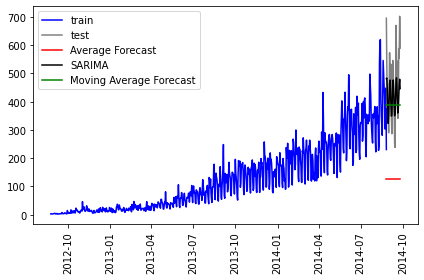

In [17]:
# Data Visualization. 
# Draw a line graph of the training set, test set, Simple Average prediction data, Moving Average prediction data and Seasonal Autoregressive Integrated Moving Average prediction date (the X-axis data is the date, and the Y-axis data is the Count or predicted value), and display the legend.

plt.plot(train.index, train['Count'], color = 'blue', label = 'train')
plt.plot(test.index, test['Count'], color = 'gray', label = 'test')
plt.plot(y_hat_avg.index, y_hat_avg['avg_forecast'], color='red', label='Average Forecast')
plt.plot(y_hat_avg.index, y_hat_avg['SARIMA'], color='black', label='SARIMA')
plt.plot(y_hat_avg.index, y_hat_avg['moving_avg_forcast'], color = 'green', label = 'Moving Average Forecast')

plt.xticks(rotation=90)
plt.tight_layout()
plt.legend()
plt.show()
                                    